In [5]:
#import packages.
#This code allows plots to be shown "in-line"
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 

In [6]:
#import data
bank = pd.read_csv("bank_data.csv")
print bank.columns
print bank.head()
print bank.current_acct.dtype

Index([u'id', u'age', u'income', u'children', u'gender', u'region', u'married', u'car', u'savings_acct', u'current_acct', u'mortgage', u'pep'], dtype='object')
        id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   
3  ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO   
4  ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  
3           NO          YES       NO   NO  
4          YES           NO       NO   NO  
object


In [7]:
#create target and PV
bank.target = bank[bank.columns[11]]
bank.data=bank[bank.columns[1:10]]
print bank.target.head()
print bank.data.head()


0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object
   age   income  children  gender      region married  car savings_acct  \
0   48  17546.0         1  FEMALE  INNER_CITY      NO   NO           NO   
1   40  30085.1         3    MALE        TOWN     YES  YES           NO   
2   51  16575.4         0  FEMALE  INNER_CITY     YES  YES          YES   
3   23  20375.4         3  FEMALE        TOWN     YES   NO           NO   
4   57  50576.3         0  FEMALE       RURAL     YES   NO          YES   

  current_acct  
0           NO  
1          YES  
2          YES  
3          YES  
4           NO  


In [8]:
#convert the target variable to a bolean
bank.target[0:].replace('NO', 0,'YES', 1)
bank.target[0:].replace('YES', 1,'NO', 0)
bank.target.astype(int)

0     1
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    0
...
585    0
586    1
587    1
588    0
589    0
590    0
591    1
592    0
593    1
594    0
595    0
596    0
597    1
598    0
599    1
Name: pep, Length: 600, dtype: int64

In [9]:
print bank.data.describe()

              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000


In [10]:
#Transform to Min-Max
Age_norm=(bank.data.age-bank.data.age.min())/(bank.data.age.max()-bank.data.age.min())
Income_norm=(bank.data.income-bank.data.income.min())/(bank.data.income.max()-bank.data.income.min())
Children_norm=(bank.data.children-bank.data.children.min())/(bank.data.children.max()-bank.data.children.min())
#Create new df with normed values
df1=pd.DataFrame(np.array([Age_norm,Income_norm,Children_norm]).T, columns=["Age","Income","Children"])
print Age_norm.head()
print Age_norm.max()


0    0.612245
1    0.448980
2    0.673469
3    0.102041
4    0.795918
Name: age, dtype: float64
1.0


In [11]:
#Standard Spreadsheet format
#Create a new dataframe of normed values and dummies called New_Bank_Data
new_bank_data=pd.DataFrame(pd.concat([df1,pd.get_dummies(bank.data['gender'], prefix='gender'),
                        pd.get_dummies(bank.data['region'], prefix='region') ,
                        pd.get_dummies(bank.data['married'], prefix='married'), pd.get_dummies(bank.data['car'], prefix='car'),
                     pd.get_dummies(bank.data['savings_acct'], prefix='savings_acct'),
                     pd.get_dummies(bank.data['current_acct'], prefix='current_acct')],
                     axis=1))
print new_bank_data.head()

        Age    Income  Children  gender_FEMALE  gender_MALE  \
0  0.612245  0.215634  0.333333              1            0   
1  0.448980  0.431395  1.000000              0            1   
2  0.673469  0.198933  0.000000              1            0   
3  0.102041  0.264320  1.000000              1            0   
4  0.795918  0.783987  0.000000              1            0   

   region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  married_NO  \
0                  1             0                0            0           1   
1                  0             0                0            1           0   
2                  1             0                0            0           0   
3                  0             0                0            1           0   
4                  0             1                0            0           0   

   married_YES  car_NO  car_YES  savings_acct_NO  savings_acct_YES  \
0            0       1        0                1                 0   


In [12]:
print new_bank_data.describe()

              Age      Income    Children  gender_FEMALE  gender_MALE  \
count  600.000000  600.000000  600.000000     600.000000   600.000000   
mean     0.497857    0.387326    0.337222       0.500000     0.500000   
std      0.294387    0.221961    0.352251       0.500417     0.500417   
min      0.000000    0.000000    0.000000       0.000000     0.000000   
25%      0.244898    0.210791    0.000000       0.000000     0.000000   
50%      0.489796    0.342610    0.333333       0.500000     0.500000   
75%      0.760204    0.536144    0.666667       1.000000     1.000000   
max      1.000000    1.000000    1.000000       1.000000     1.000000   

       region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  \
count         600.000000    600.000000       600.000000   600.000000   
mean            0.448333      0.160000         0.103333     0.288333   
std             0.497738      0.366912         0.304648     0.453365   
min             0.000000      0.000000         0.00000

In [13]:
#create test and training of data
#80% in test
tpercent = 0.8
tsize = tpercent * len(new_bank_data)
bank_train = pd.DataFrame(new_bank_data[:480])
bank_test = pd.DataFrame(new_bank_data[481:600])

In [14]:
#Just wanted to try this with the test data to see if it all worked.
from sklearn.linear_model import LogisticRegression

# fit a linear regression model to the data
model_LR = LogisticRegression()
model_LR.fit(new_bank_data, bank.target)
print(model_LR)
# make predictions
expected_LR = bank.target
predicted_LR = model_LR.predict(new_bank_data)
# summarize the fit of the model
mse_LR = np.mean((predicted_LR-expected_LR)**2)
print "Coef", model_LR.intercept_, model_LR.coef_
#print "RSquare", (model_LR.score(new_bank_data, bank.target)) #R square
print "MSE", mse_LR
#print "RSquare", r2_score(expected_LR, predicted_LR)  #same as above

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)
Coef [-0.17915873] [[ 0.47567202  1.74485934 -0.41928474 -0.22161479  0.04245606 -0.11663503
  -0.05665109  0.23521816 -0.24109076  0.33632387 -0.5154826  -0.10764469
  -0.07151404  0.19939156 -0.37855029 -0.12794716 -0.05121157]]
MSE 0.363333333333


In [15]:
bank_train.describe()

,Age,Income,Children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.503699,0.389827,0.336111,0.489583,0.510417,0.460417,0.160417,0.093750,0.285417,0.343750,0.656250,0.516667,0.483333,0.320833,0.679167,0.235417,0.764583
std,0.297241,0.221982,0.353255,0.500413,0.500413,0.498951,0.367375,0.291785,0.452084,0.475454,0.475454,0.500244,0.500244,0.467284,0.467284,0.424702,0.424702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244898,0.214964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.489796,0.345919,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.775510,0.538661,0.666667,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
bank_test.describe()

,Age,Income,Children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.476419,0.379553,0.338936,0.546218,0.453782,0.403361,0.151261,0.142857,0.302521,0.327731,0.672269,0.462185,0.537815,0.260504,0.739496,0.268908,0.731092
std,0.283076,0.222119,0.349827,0.499964,0.499964,0.492646,0.359818,0.351407,0.461292,0.471371,0.471371,0.500676,0.500676,0.440766,0.440766,0.445267,0.445267
min,0.000000,0.022025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234694,0.200117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.469388,0.341459,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.673469,0.515813,0.666667,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,0.942795,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#create test and training of target
#80% in test
tsize = tpercent * len(bank.target)
bank_train_target = bank.target[:480].astype(int) #this changes it from object to int
bank_test_target = bank.target[481:600].astype(int)
expected=np.array(bank_test_target)
print expected
print expected.dtype
print bank_test_target

[1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 1]
int64
481    1
482    0
483    0
484    1
485    0
486    0
487    1
488    0
489    1
490    1
491    1
492    1
493    1
494    0
495    1
...
585    0
586    1
587    1
588    0
589    0
590    0
591    1
592    0
593    1
594    0
595    0
596    0
597    1
598    0
599    1
Name: pep, Length: 119, dtype: int64


In [18]:
bank_train.to_csv('bank.csv')
bank_train_target.to_csv('bank_target.csv')

In [19]:
#Basic Decsion Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(bank_train, bank_train_target)
print clf

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')


In [20]:
#test model using test data
target_predicted_DT1 = clf.predict(bank_test)
accuracy_score(expected,target_predicted_DT1)

0.83193277310924374

[[53  8]
 [12 46]]


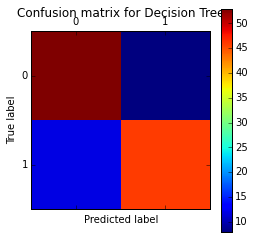

In [21]:
# display confusion matrix for DT
cm = confusion_matrix(expected, target_predicted_DT1)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix for Decision Tree')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [22]:
# print classification report
target_names = ['No', 'Yes']
print classification_report(expected, target_predicted_DT1, target_names= target_names)

             precision    recall  f1-score   support

         No       0.82      0.87      0.84        61
        Yes       0.85      0.79      0.82        58

avg / total       0.83      0.83      0.83       119



In [23]:
#Basic Decsion Tree
clf1 = tree.DecisionTreeClassifier(criterion='entropy')
clf1 = clf1.fit(bank_train, bank_train_target)
print clf1
#test model using test data
target_predicted_DT2 = clf1.predict(bank_test)
accuracy_score(expected,target_predicted_DT2)

DecisionTreeClassifier(compute_importances=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')


0.80672268907563027

[[49 12]
 [11 47]]
0.806722689076


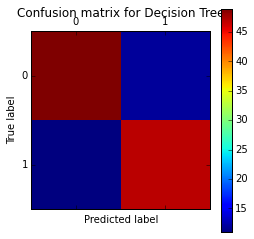

In [24]:
# display confusion matrix fro DT
cm_DT1 = confusion_matrix(expected, target_predicted_DT2)
print(cm_DT1)
print accuracy_score(expected,target_predicted_DT2)
plt.matshow(cm_DT1)
plt.title('Confusion matrix for Decision Tree')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [25]:
#Try KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(bank_train, bank_train_target) 
predicted_KNN1 = neigh.predict(bank_test)
print(neigh)
# make predictions
print expected
# summarize the fit of the model
print(classification_report(expected, predicted_KNN1))
print(confusion_matrix(expected, predicted_KNN1))
print accuracy_score(expected,predicted_KNN1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')
[1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 1]
             precision    recall  f1-score   support

          0       0.60      0.66      0.62        61
          1       0.60      0.53      0.56        58

avg / total       0.60      0.60      0.60       119

[[40 21]
 [27 31]]
0.596638655462


[[40 21]
 [27 31]]


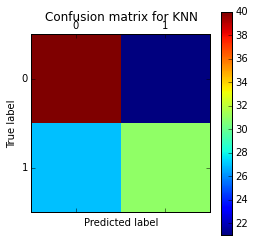

In [26]:
# display confusion matrix
cm_KNN = confusion_matrix(expected, predicted_KNN1)
print(cm_KNN)
plt.matshow(cm_KNN)
plt.title('Confusion matrix for KNN')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [27]:
#Try KNN Part 2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
neigh.fit(bank_train, bank_train_target) 
predicted_KNN2 = neigh.predict(bank_test)
print(neigh)
# make predictions
print expected
# summarize the fit of the model
print(classification_report(expected, predicted_KNN2))
print(confusion_matrix(expected, predicted_KNN2))
print "Accurancy", accuracy_score(expected,predicted_KNN2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')
[1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 1]
             precision    recall  f1-score   support

          0       0.61      0.62      0.62        61
          1       0.60      0.59      0.59        58

avg / total       0.60      0.61      0.60       119

[[38 23]
 [24 34]]
Accurancy 0.605042016807


[[38 23]
 [24 34]]


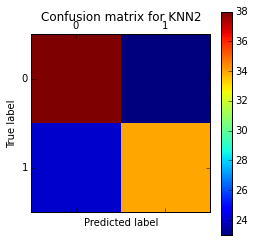

In [28]:
# display confusion matrix
cm_KNN2 = confusion_matrix(expected, predicted_KNN2)
print(cm_KNN2)
plt.matshow(cm_KNN2)
plt.title('Confusion matrix for KNN2')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [29]:
#Try KNN part 3, weigthed minkowski and distance weights
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors=4, metric='minkowski', weights='distance')
neigh.fit(bank_train, bank_train_target) 
predicted_KNN3 = neigh.predict(bank_test)
print(neigh)
# make predictions
print expected
# summarize the fit of the model
print(classification_report(expected, predicted_KNN3))
print(confusion_matrix(expected, predicted_KNN3))
print accuracy_score(expected,predicted_KNN3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=4, p=2, weights='distance')
[1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 1]
             precision    recall  f1-score   support

          0       0.61      0.62      0.62        61
          1       0.60      0.59      0.59        58

avg / total       0.60      0.61      0.60       119

[[38 23]
 [24 34]]
0.605042016807


In [30]:
#Use NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(bank_train, bank_train_target).predict(bank_test)
print("Number of mislabeled points out of a total %d points : %d" % (bank_test.shape[0],(bank_test_target != y_pred).sum()))

Number of mislabeled points out of a total 119 points : 38


In [31]:
#Predict Probabiliity of each test instance.
gnb.predict_proba(bank_test)

array([[ 0.13980651,  0.86019349],
       [ 0.13877089,  0.86122911],
       [ 0.83726172,  0.16273828],
       [ 0.85343414,  0.14656586],
       [ 0.39170914,  0.60829086],
       [ 0.93890322,  0.06109678],
       [ 0.54346851,  0.45653149],
       [ 0.98304117,  0.01695883],
       [ 0.93399427,  0.06600573],
       [ 0.79734909,  0.20265091],
       [ 0.38431801,  0.61568199],
       [ 0.85429691,  0.14570309],
       [ 0.14193666,  0.85806334],
       [ 0.69178405,  0.30821595],
       [ 0.62617265,  0.37382735],
       [ 0.17928861,  0.82071139],
       [ 0.08852043,  0.91147957],
       [ 0.19976576,  0.80023424],
       [ 0.70192829,  0.29807171],
       [ 0.96090967,  0.03909033],
       [ 0.09679633,  0.90320367],
       [ 0.83396711,  0.16603289],
       [ 0.54218284,  0.45781716],
       [ 0.17103596,  0.82896404],
       [ 0.84235313,  0.15764687],
       [ 0.76444092,  0.23555908],
       [ 0.22426915,  0.77573085],
       [ 0.02085291,  0.97914709],
       [ 0.81634758,

In [32]:
gnb.score(bank_test, expected, sample_weight=None)

0.68067226890756305